<a href="https://colab.research.google.com/github/maripisravankumar/WhatsApp-Text-Analysis-/blob/main/Final_Model_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('iot_telemetry_data.csv')

In [ ]:
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [ ]:
df.drop(['ts','device','lpg','motion'],axis=1,inplace=True)

In [ ]:
df.head()

,co,humidity,light,smoke,temp
0,0.004956,51.000000,False,0.020411,22.700000
1,0.002840,76.000000,False,0.013275,19.700001
2,0.004976,50.900000,False,0.020475,22.600000
3,0.004403,76.800003,True,0.018628,27.000000
4,0.004967,50.900000,False,0.020448,22.600000


In [ ]:
df.shape

(405184, 5)

In [ ]:
print(df.describe())

                  co       humidity          smoke           temp
count  405184.000000  405184.000000  405184.000000  405184.000000
mean        0.004639      60.511694       0.019264      22.453987
std         0.001250      11.366489       0.004086       2.698347
min         0.001171       1.100000       0.006692       0.000000
25%         0.003919      51.000000       0.017024      19.900000
50%         0.004812      54.900000       0.019950      22.200000
75%         0.005409      74.300003       0.021838      23.600000
max         0.014420      99.900002       0.046590      30.600000


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_light=LabelEncoder()

In [ ]:
df['light_n']=le_light.fit_transform(df['light'])

In [ ]:
df.head()

,co,humidity,light,smoke,temp,light_n
0,0.004956,51.000000,False,0.020411,22.700000,0
1,0.002840,76.000000,False,0.013275,19.700001,0
2,0.004976,50.900000,False,0.020475,22.600000,0
3,0.004403,76.800003,True,0.018628,27.000000,1
4,0.004967,50.900000,False,0.020448,22.600000,0


In [ ]:
df.drop('light',axis='columns')

,co,humidity,smoke,temp,light_n
0,0.004956,51.000000,0.020411,22.700000,0
1,0.002840,76.000000,0.013275,19.700001,0
2,0.004976,50.900000,0.020475,22.600000,0
3,0.004403,76.800003,0.018628,27.000000,1
4,0.004967,50.900000,0.020448,22.600000,0
...,...,...,...,...,...
405179,0.003745,75.300003,0.016437,19.200001,0
405180,0.005882,48.500000,0.023301,22.200000,0
405181,0.004540,75.699997,0.019076,26.600000,1
405182,0.003745,75.300003,0.016437,19.200001,0


In [ ]:
y=df['light_n']
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(['light','light_n'],axis='columns')
x.head()

,co,humidity,smoke,temp
0,0.004956,51.000000,0.020411,22.700000
1,0.002840,76.000000,0.013275,19.700001
2,0.004976,50.900000,0.020475,22.600000
3,0.004403,76.800003,0.018628,27.000000
4,0.004967,50.900000,0.020448,22.600000


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.head()

,co,humidity,smoke,temp
91222,0.004816,73.699997,0.019964,19.0
129461,0.004972,54.900000,0.020461,22.1
263750,0.006062,48.800000,0.023849,21.9
125789,0.005002,53.800000,0.020557,22.2
116175,0.004857,54.900000,0.020094,22.4


# DECISION TREE

In [ ]:
from sklearn import tree

In [ ]:
model=tree.DecisionTreeClassifier(criterion='gini',max_depth=5,max_features=4,min_samples_split=10000,min_samples_leaf=1000)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1000, min_samples_split=10000,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.score(x_test,y_test)

0.9810456951762775

In [ ]:
#Checking if there is overfitting/underfitting

In [ ]:
pred_test=model.predict(x_test)
pred_train=model.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_train=accuracy_score(y_train,pred_train)
accuracy_test=accuracy_score(y_test,pred_test)

In [ ]:
print(accuracy_train)

0.9809623411600292


In [ ]:
print(accuracy_test)

0.9810456951762775


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_test)

array([[58459,     5],
       [ 1531, 21042]])

In [ ]:
#Type1 error and type2 is called for FN Rate
FP_Rate=(419)/(419+58053)  
print(FP_Rate)

0.00716582295799699


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     58464
           1       1.00      0.93      0.96     22573

    accuracy                           0.98     81037
   macro avg       0.99      0.97      0.98     81037
weighted avg       0.98      0.98      0.98     81037



In [ ]:
from sklearn.metrics import precision_recall_curve
precision ,recall,thresholds=precision_recall_curve(y_test,pred_test)

In [ ]:
precision

array([0.27855177, 0.99976244, 1.        ])

In [ ]:
recall

array([1.        , 0.93217561, 0.        ])

In [ ]:
thresholds

array([0, 1])

In [ ]:
model.score(x_test,y_test)

0.9810456951762775

In [ ]:
model.predict([[0.0040,54.699997,0.00076,21.600000]])

array([0])

# Hypertuning for decision tree

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
max_features=['auto']
max_depth=[int(x) for x in np.linspace(start=10,stop=50,num=5)]
min_sample_split=[2,4,6]
min_samples_leaf=[1,3,5]
dtrandom_grid={
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_sample_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':['entropy','gini']
}
print(dtrandom_grid)

{'max_features': ['auto'], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5], 'criterion': ['entropy', 'gini']}


In [ ]:
dt=tree.DecisionTreeClassifier()
dt_randomcv=RandomizedSearchCV(estimator=dt,param_distributions=dtrandom_grid,n_iter=2,cv=2,verbose=2,random_state=2,n_jobs=-1)
dt_randomcv.fit(x_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.1s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
dt_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [ ]:
dtmodel=tree.DecisionTreeClassifier(criterion='gini',max_features='auto',max_depth=40,min_samples_split=6,min_samples_leaf=3).fit(x_train,y_train)
predictions=dtmodel.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[58125   339]
 [  576 21997]]
0.9887088613843059
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58464
           1       0.98      0.97      0.98     22573

    accuracy                           0.99     81037
   macro avg       0.99      0.98      0.99     81037
weighted avg       0.99      0.99      0.99     81037



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt_param_grid={
    'criterion':[dt_randomcv.best_params_['criterion']],
    'max_depth':[dt_randomcv.best_params_['max_depth']-5,
                dt_randomcv.best_params_['max_depth'],
                dt_randomcv.best_params_['max_depth']+5],
    'max_features':[dt_randomcv.best_params_['max_features']],
    'min_samples_leaf':[dt_randomcv.best_params_['min_samples_leaf'],
                       dt_randomcv.best_params_['min_samples_leaf']+1,
                       dt_randomcv.best_params_['min_samples_leaf']+2],
    'min_samples_split':[dt_randomcv.best_params_['min_samples_split']-1,
                        dt_randomcv.best_params_['min_samples_split'],
                        dt_randomcv.best_params_['min_samples_split']+1]
    
}
print(dt_param_grid)

{'criterion': ['gini'], 'max_depth': [35, 40, 45], 'max_features': ['auto'], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [5, 6, 7]}


In [ ]:
dt=tree.DecisionTreeClassifier()
dt_grid_search=GridSearchCV(estimator=dt,param_grid=dt_param_grid,cv=2,n_jobs=-1)
dt_grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [35, 40, 45],
     

In [ ]:
dt_grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=45, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_modell=tree.DecisionTreeClassifier(criterion='gini',max_depth=35,min_samples_split=6,min_samples_leaf=4).fit(x_train,y_train)
predictions=dt_modell.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[58158   306]
 [  553 22020]]
0.9893999037476708
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58464
           1       0.99      0.98      0.98     22573

    accuracy                           0.99     81037
   macro avg       0.99      0.99      0.99     81037
weighted avg       0.99      0.99      0.99     81037



# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()

In [ ]:
model1.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model2.score(x_test,y_test)

0.9950886632032282

# tuning hyperparameter

In [ ]:
rf_classifier=RandomForestClassifier(n_estimators=10)
rf_classifier.fit(x_train,y_train)
rf_classifier.score(x_test,y_test)
prediction=rf_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[58114   350]
 [  558 22015]]
0.9887952416797265
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58464
           1       0.98      0.98      0.98     22573

    accuracy                           0.99     81037
   macro avg       0.99      0.98      0.99     81037
weighted avg       0.99      0.99      0.99     81037



In [ ]:
#manual hyperparameter tunig
model=RandomForestClassifier(n_estimators=100,criterion='gini',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[58307   157]
 [  686 21887]]
0.9895973444229179
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58464
           1       0.99      0.97      0.98     22573

    accuracy                           0.99     81037
   macro avg       0.99      0.98      0.99     81037
weighted avg       0.99      0.99      0.99     81037



In [ ]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=50,num=4)]
max_features=['auto']
max_depth=[int(x) for x in np.linspace(start=10,stop=50,num=5)]
min_sample_split=[2,4,6]
min_samples_leaf=[1,3,5]
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_sample_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':['entropy','gini']
}
print(random_grid)

{'n_estimators': [10, 23, 36, 50], 'max_features': ['auto'], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=2,cv=2,verbose=2,random_state=2,n_jobs=-1)
rf_randomcv.fit(x_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.6s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
modell=RandomForestClassifier(n_estimators=10,criterion='entropy',max_features='auto',max_depth=50,min_samples_split=2,min_samples_leaf=5).fit(x_train,y_train)
predictions=modell.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[58255   209]
 [  634 21939]]
0.9895973444229179
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58464
           1       0.99      0.97      0.98     22573

    accuracy                           0.99     81037
   macro avg       0.99      0.98      0.99     81037
weighted avg       0.99      0.99      0.99     81037



In [ ]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
param_grid={
    'criterion':[rf_randomcv.best_params_['criterion']],
    'max_depth':[rf_randomcv.best_params_['max_depth']],
    'max_features':[rf_randomcv.best_params_['max_features']],
    'min_samples_leaf':[rf_randomcv.best_params_['min_samples_leaf'],
                       rf_randomcv.best_params_['min_samples_leaf']+1,
                       rf_randomcv.best_params_['min_samples_leaf']+2],
    'min_samples_split':[rf_randomcv.best_params_['min_samples_split']-1,
                        rf_randomcv.best_params_['min_samples_split'],
                        rf_randomcv.best_params_['min_samples_split']+1],
    'n_estimators':[rf_randomcv.best_params_['n_estimators']-2,
                   rf_randomcv.best_params_['n_estimators'],
                   rf_randomcv.best_params_['n_estimators']+2]
    
}
print(param_grid)

{'criterion': ['entropy'], 'max_depth': [50], 'max_features': ['auto'], 'min_samples_leaf': [5, 6, 7], 'min_samples_split': [1, 2, 3], 'n_estimators': [8, 10, 12]}


In [ ]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=2,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
modell=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=50,min_samples_split=3,min_samples_leaf=5).fit(x_train,y_train)
predictions=modell.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[58271   193]
 [  624 21949]]
0.9899181855201945
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58464
           1       0.99      0.97      0.98     22573

    accuracy                           0.99     81037
   macro avg       0.99      0.98      0.99     81037
weighted avg       0.99      0.99      0.99     81037



In [ ]:
y_test.head()

313746    0
315151    1
266438    0
396314    0
59327     0
Name: light_n, dtype: int64

# Comparing ROC and AUROC 

In [ ]:
r_probs=[0 for  _ in range(len(y_test))]
rf_probs=model1.predict(x_test)
nb_probs=model2.predict(x_test)

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
r_auc=roc_auc_score(y_test,r_probs)
rf_auc=roc_auc_score(y_test,rf_probs)
nb_auc=roc_auc_score(y_test,nb_probs)
print(r_auc,rf_auc,nb_auc)

0.5 0.9659761967381824 0.9931150861544606


In [ ]:
#calculating ROC curve

In [ ]:
r_fpr,r_tpr, _ =roc_curve(y_test,r_probs)
rf_fpr,rf_tpr, _ =roc_curve(y_test,rf_probs)
nb_fpr,nb_tpr, _ =roc_curve(y_test,nb_probs)


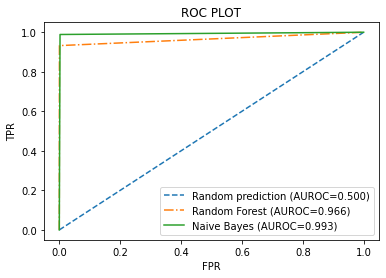

In [ ]:
#plotting
plt.plot(r_fpr,r_tpr,linestyle='--',label='Random prediction (AUROC=%0.3f)'%r_auc)
plt.plot(rf_fpr,rf_tpr,linestyle='-.',label='Random Forest (AUROC=%0.3f)'%rf_auc)
plt.plot(nb_fpr,nb_tpr,linestyle='-',label='Naive Bayes (AUROC=%0.3f)'%nb_auc)

plt.title('ROC PLOT')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()


# LOGISTIC REGRESSION

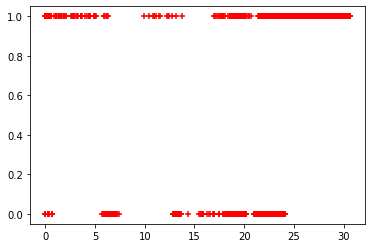

In [ ]:
plt.scatter(df.temp,y,marker='+',color='red')

In [ ]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()

In [ ]:
model3.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model3.score(x_test,y_test)

0.9792070288880388

In [ ]:
logModel=LogisticRegression()

In [ ]:
lr_param_grid=[{
    'penalty':['l1','l2'],
    'C':np.logspace(-4,4,3),
    'solver':['lbfgs','newton-cg'],
    'max_iter':[10,30,100]}
]
print(lr_param_grid)

[{'penalty': ['l1', 'l2'], 'C': array([1.e-04, 1.e+00, 1.e+04]), 'solver': ['lbfgs', 'newton-cg'], 'max_iter': [10, 30, 100]}]


In [ ]:
lr=GridSearchCV(logModel,param_grid=lr_param_grid,cv=2,n_jobs=-1)
bestlr=lr.fit(x_test,y_test)

In [ ]:
bestlr.best_estimator_

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lg_model=LogisticRegression(C=10000.0,solver='newton-cg')
lg_model.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lg_model.score(x_test,y_test)

0.9799104112936067

# SVM

In [ ]:
from sklearn.svm import SVC
svc=SVC(probability=True,kernel='linear',C=0.001,gamma=0.002)
svc.fit(x_train,y_train)

In [ ]:
svc.score(x_test,y_test)

# XG Boost

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10 ] ,
 "max_depth"        : [ 3, 6],
 "min_child_weight" : [ 2, 4 ],
 "gamma"            : [ 0.1,0.4 ],
 "colsample_bytree" : [ 0.3, 0.4]  
}
print(params)

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=2,scoring='roc_auc',n_jobs=-1,cv=2,verbose=3)

In [ ]:
random_search.fit(x_train,y_train)

In [ ]:
random_search.best_params_

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_train,y_train,cv=5)

In [ ]:
score